In [1]:
import pandas as pd

col_list = ['A' + str(i) for i in range(1, 17)] # assign headers(columns names) to the dataset

# import the data set from archive and assign the header 
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data", header=None, names=col_list) # import the data set

df.head() # quick look at the dataset including the header 

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [2]:
# cleaning the data and prepar it 

for col_name in df.columns:   # loop over al the columns 
    col = df[col_name]
    miss = col.isnull().sum() # count how many values are missing 
    if miss > 0:              # if more than one value is missning 
        col.fillna(col.mode()[0], inplace = True) # replace missing values with the mode of that column 

In [3]:
# other problem this dataset have is some of the values are '?' so we have to deal with it
# for example if we looka at first columns we should see only ('a' and 'b') values only 

set(df['A1']) # if we use set will return dictionary with 3 values 

{'?', 'a', 'b'}

In [4]:
# with simple for loop we can see all the columns with '?' value 
for name_col in df[['A1', 'A4', 'A5', 'A7']]:
    name = df[name_col]
    print(set(df[name_col]))

{'b', '?', 'a'}
{'y', 'l', 'u', '?'}
{'g', 'p', 'gg', '?'}
{'h', 'j', 'ff', 'dd', 'bb', 'z', 'v', 'o', 'n', '?'}


In [5]:
# we can use replace method in pandas 
df = df.replace(['?'], method='bfill') # replace '?' values with next value

In [6]:
# check our work
for name_col in df[['A1', 'A4', 'A5', 'A7']]:
    name = df[name_col]
    print(set(df[name_col]))

{'b', 'a'}
{'y', 'l', 'u'}
{'g', 'p', 'gg'}
{'h', 'j', 'ff', 'dd', 'bb', 'z', 'v', 'o', 'n'}


In [7]:
df.to_csv('clean_crx.csv', index=False) # this is optional if you need to use clean data 
df = pd.read_csv('clean_crx.csv') 

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics



X = df[df.columns[0:-1]] # columns 0 to second last column contain non-class attributes 
X = pd.get_dummies(X)
y = df.A16 # store class lables in the variable y

# divide the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # note we using %80 training size

Depth, Criteria, Accuracy_score
1      entropy      0.8695652173913043
2      entropy      0.8695652173913043
3      entropy      0.8405797101449275
4      entropy      0.8405797101449275
1      gini      0.8695652173913043
2      gini      0.8623188405797102
3      gini      0.8405797101449275
4      gini      0.8478260869565217


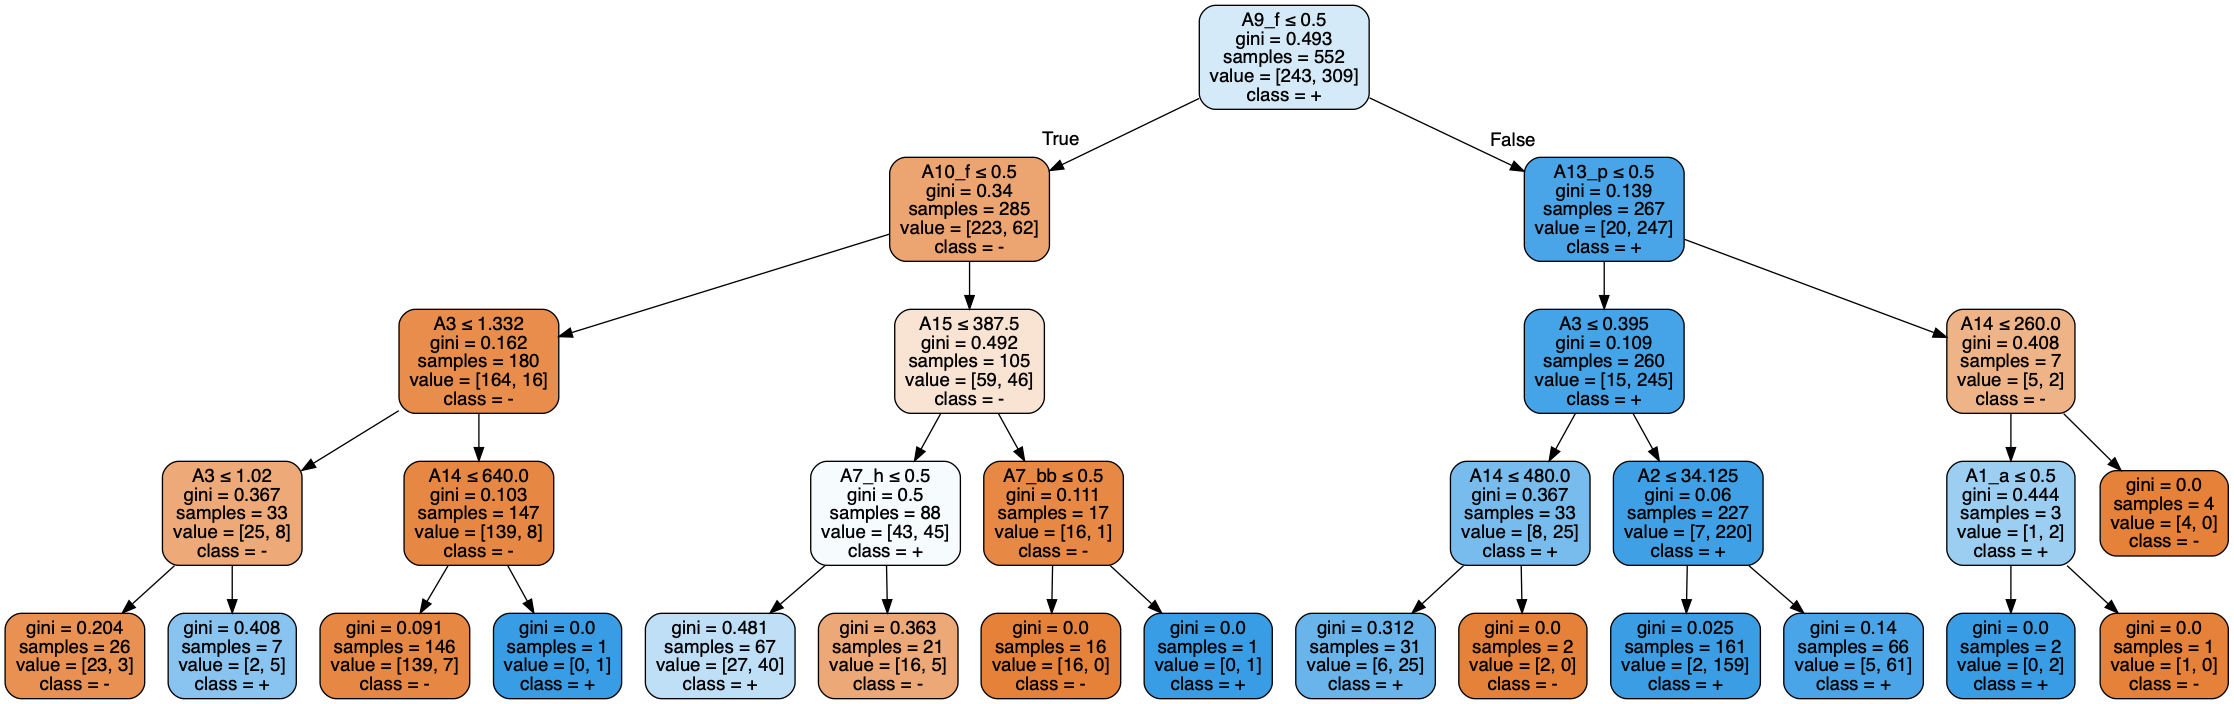

In [20]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  # note this packge do not come with anaconda you have to install it with pip
import pydotplus # note this packge do not come with anaconda you have to install it with pip 

criteria = ["entropy", "gini"]

print('Depth, Criteria, Accuracy_score')
n = 1
for crt in criteria:
    for depth in range(1,5):
        dt = DecisionTreeClassifier(max_depth=depth, criterion=crt) # create an instance od DecisionTreeClassifier
        dt.fit(X_train, y_train) # train teh classifier on the training data to learn a model 
        y_predicted = dt.predict(X_test) # used the learned model to predict class labels for test values
        accuracy = metrics.accuracy_score(y_test,y_predicted) # compute the accuracy score by comparing actual and predicted class labels
        print(depth, '    ', crt , '    ', str(accuracy))
        dot_data = StringIO()
        export_graphviz(dt, out_file=dot_data,  
                        filled=True, rounded=True,
                        special_characters=True,feature_names = X.columns,class_names=list(set(y)))
        graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
        graph.write_png(f'visualize_decision_Tree{n}.png')
        n += 1
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=list(set(y)))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 

Accuracy 0.8695652173913043


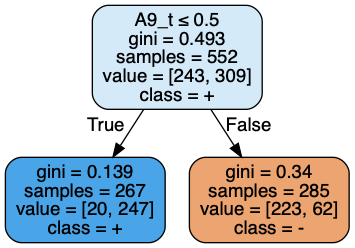

In [11]:
# we can visualize how each decision made using graphize
dt = DecisionTreeClassifier(max_depth=1, criterion='gini') # Max_depth = 1, Criterion = gini
dt.fit(X_train, y_train) # feeding the model with the data 

y_predicted = dt.predict(X_test) # getting the result from the model using the X_test set

# printing the Accuracy from the model using the function metrics from sklearn 
print('Accuracy', metrics.accuracy_score(y_test, y_predicted)) 
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=list(set(y)))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Accuracy 0.8623188405797102


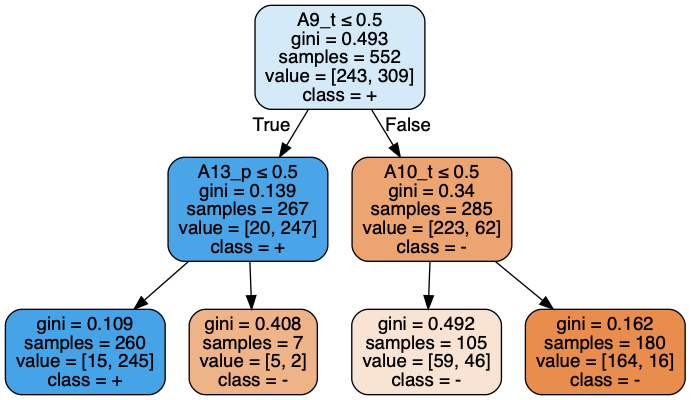

In [12]:
dt = DecisionTreeClassifier(max_depth=2, criterion='gini') # Max_depth = 2, Criterion = gini
dt.fit(X_train, y_train) # feeding the model with the data 

y_predicted = dt.predict(X_test) # getting the result from the model using the X_test set

# printing the Accuracy from the model using the function metrics from sklearn 
print('Accuracy', metrics.accuracy_score(y_test, y_predicted)) 
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=list(set(y)))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Accuracy 0.8405797101449275


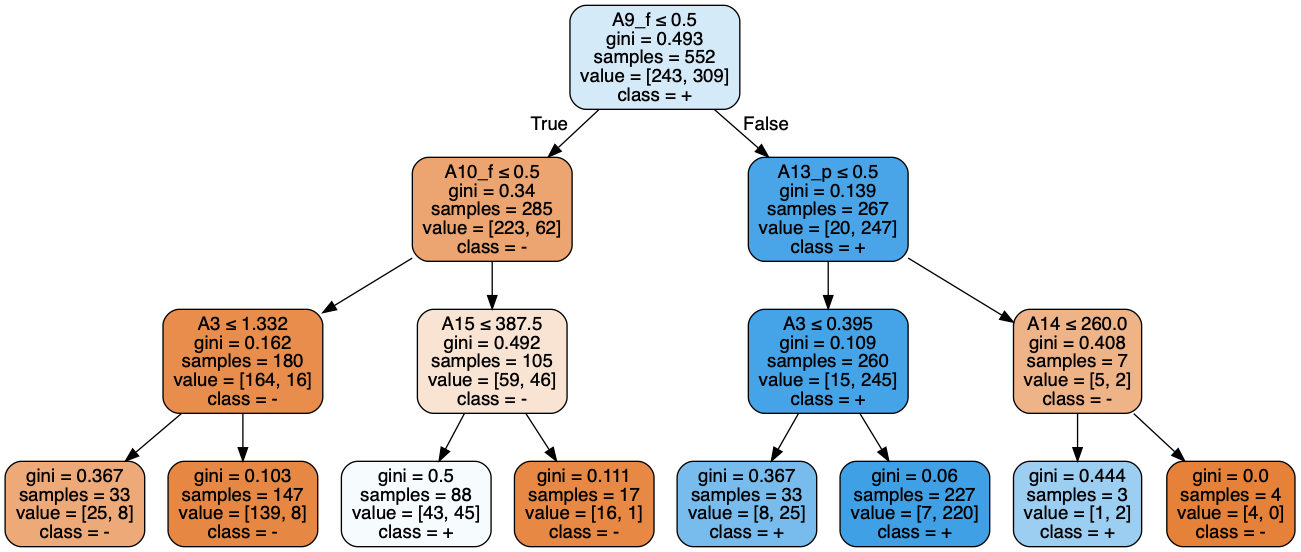

In [13]:
dt = DecisionTreeClassifier(max_depth=3, criterion='gini') # Max_depth = 3, Criterion = gini
dt.fit(X_train, y_train) # feeding the model with the data 

y_predicted = dt.predict(X_test) # getting the result from the model using the X_test set

# printing the Accuracy from the model using the function metrics from sklearn 
print('Accuracy', metrics.accuracy_score(y_test, y_predicted)) 
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=list(set(y)))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Accuracy 0.8478260869565217


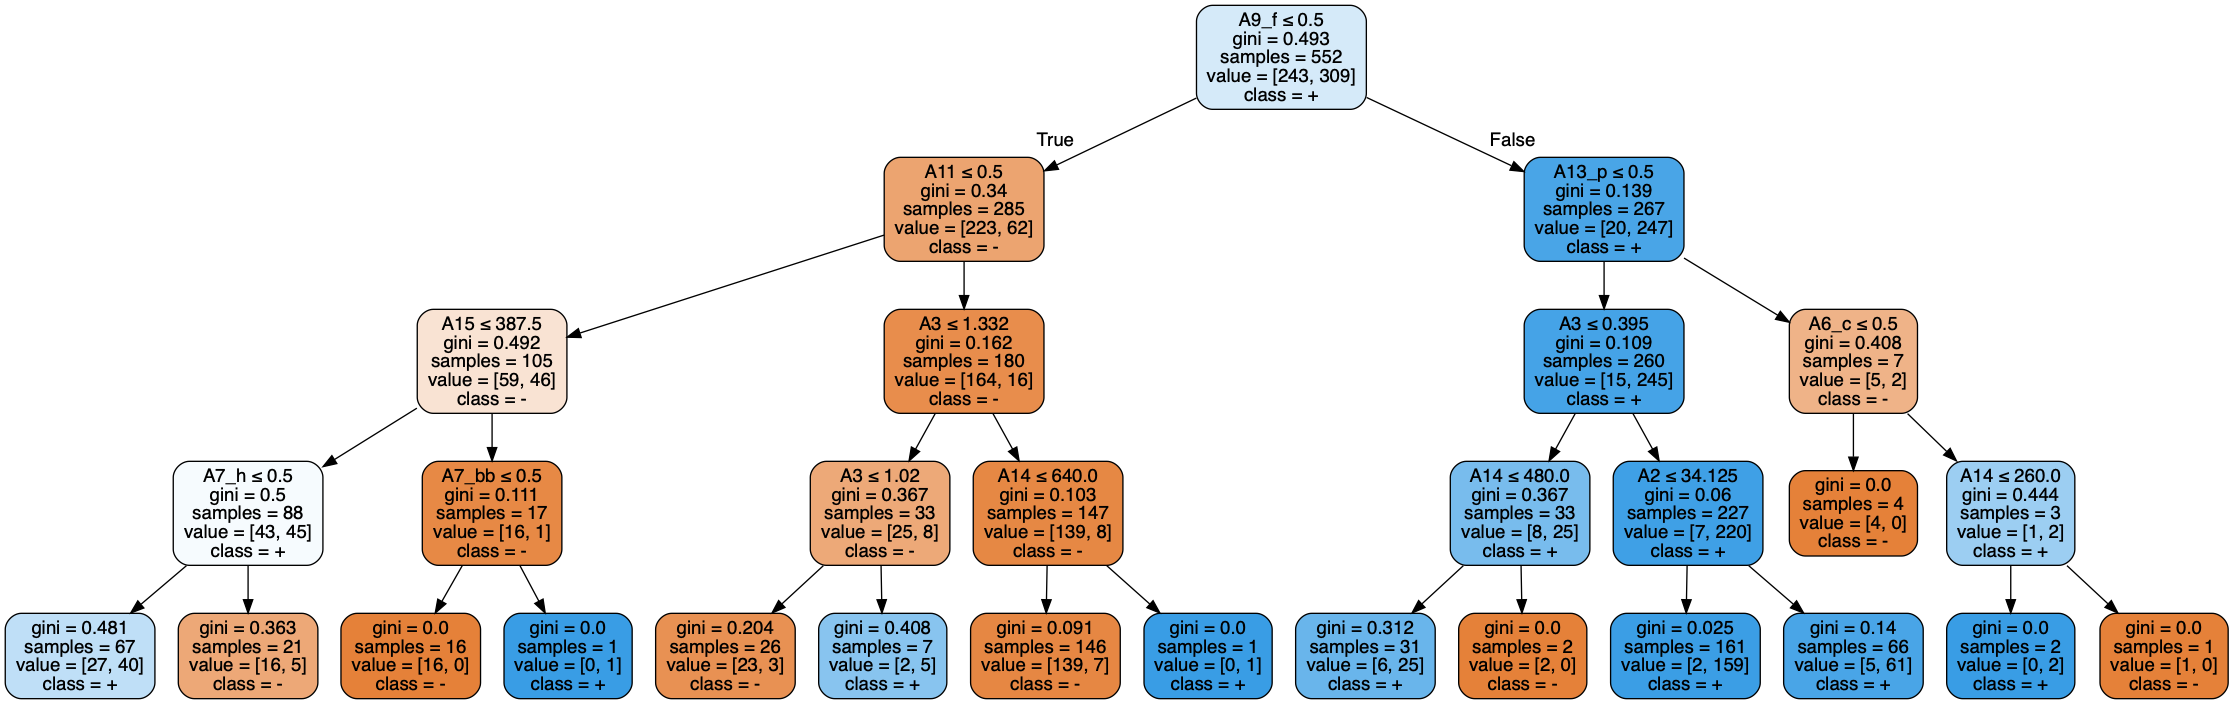

In [14]:
dt = DecisionTreeClassifier(max_depth=4, criterion='gini') # Max_depth = 4, Criterion = gini
dt.fit(X_train, y_train) # feeding the model with the data 

y_predicted = dt.predict(X_test) # getting the result from the model using the X_test set

# printing the Accuracy from the model using the function metrics from sklearn 
print('Accuracy', metrics.accuracy_score(y_test, y_predicted)) 
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=list(set(y)))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Accuracy 0.8695652173913043


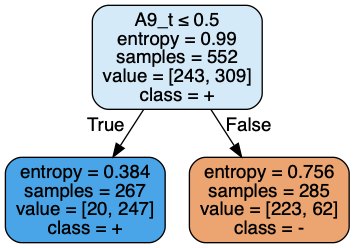

In [15]:
dt = DecisionTreeClassifier(max_depth=1, criterion='entropy') # Max_depth = 1, Criterion = entropy
dt.fit(X_train, y_train) # feeding the model with the data 

y_predicted = dt.predict(X_test) # getting the result from the model using the X_test set

# printing the Accuracy from the model using the function metrics from sklearn 
print('Accuracy', metrics.accuracy_score(y_test, y_predicted)) 
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=list(set(y)))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Accuracy 0.8695652173913043


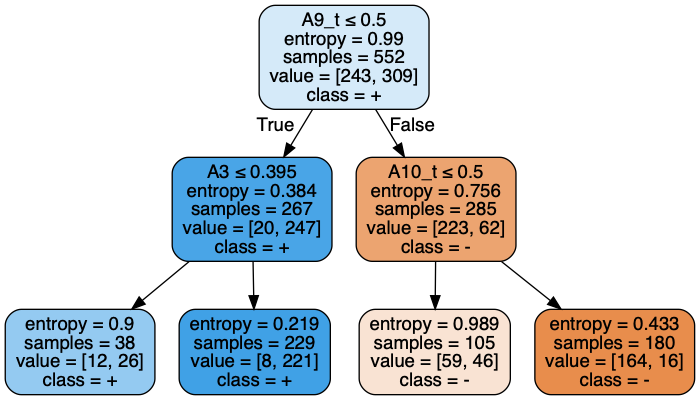

In [16]:
dt = DecisionTreeClassifier(max_depth=2, criterion='entropy') # Max_depth = 1, Criterion = entropy
dt.fit(X_train, y_train) # feeding the model with the data 

y_predicted = dt.predict(X_test) # getting the result from the model using the X_test set

# printing the Accuracy from the model using the function metrics from sklearn 
print('Accuracy', metrics.accuracy_score(y_test, y_predicted)) 
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=list(set(y)))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Accuracy 0.8405797101449275


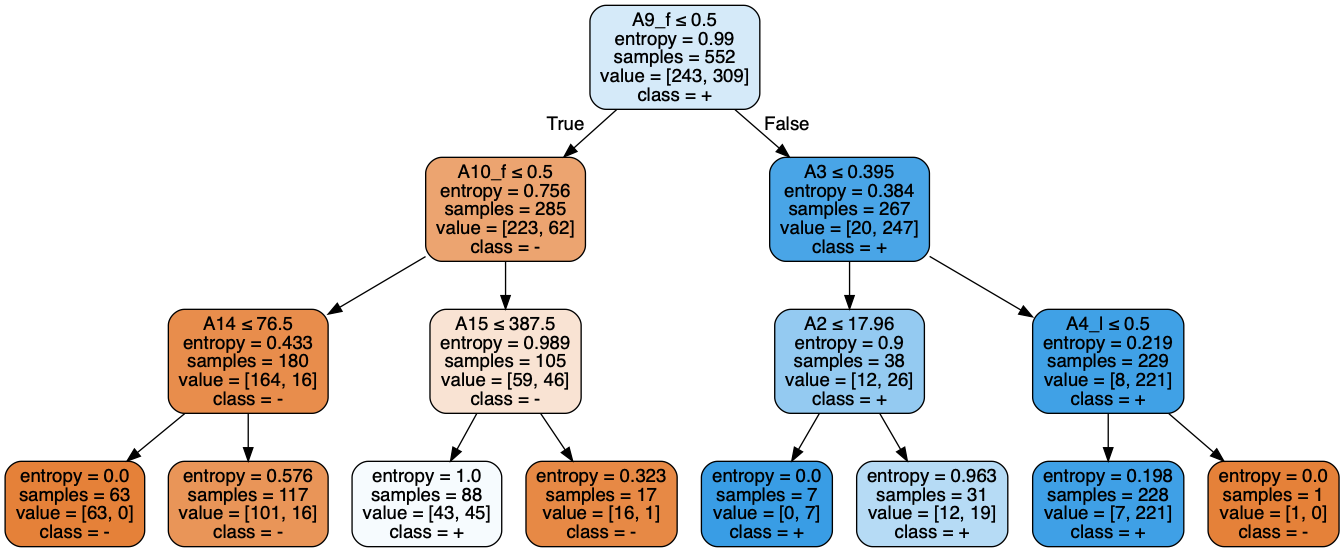

In [17]:
dt = DecisionTreeClassifier(max_depth=3, criterion='entropy') # Max_depth = 1, Criterion = entropy
dt.fit(X_train, y_train) # feeding the model with the data 

y_predicted = dt.predict(X_test) # getting the result from the model using the X_test set

# printing the Accuracy from the model using the function metrics from sklearn 
print('Accuracy', metrics.accuracy_score(y_test, y_predicted)) 
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=list(set(y)))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Accuracy 0.8478260869565217


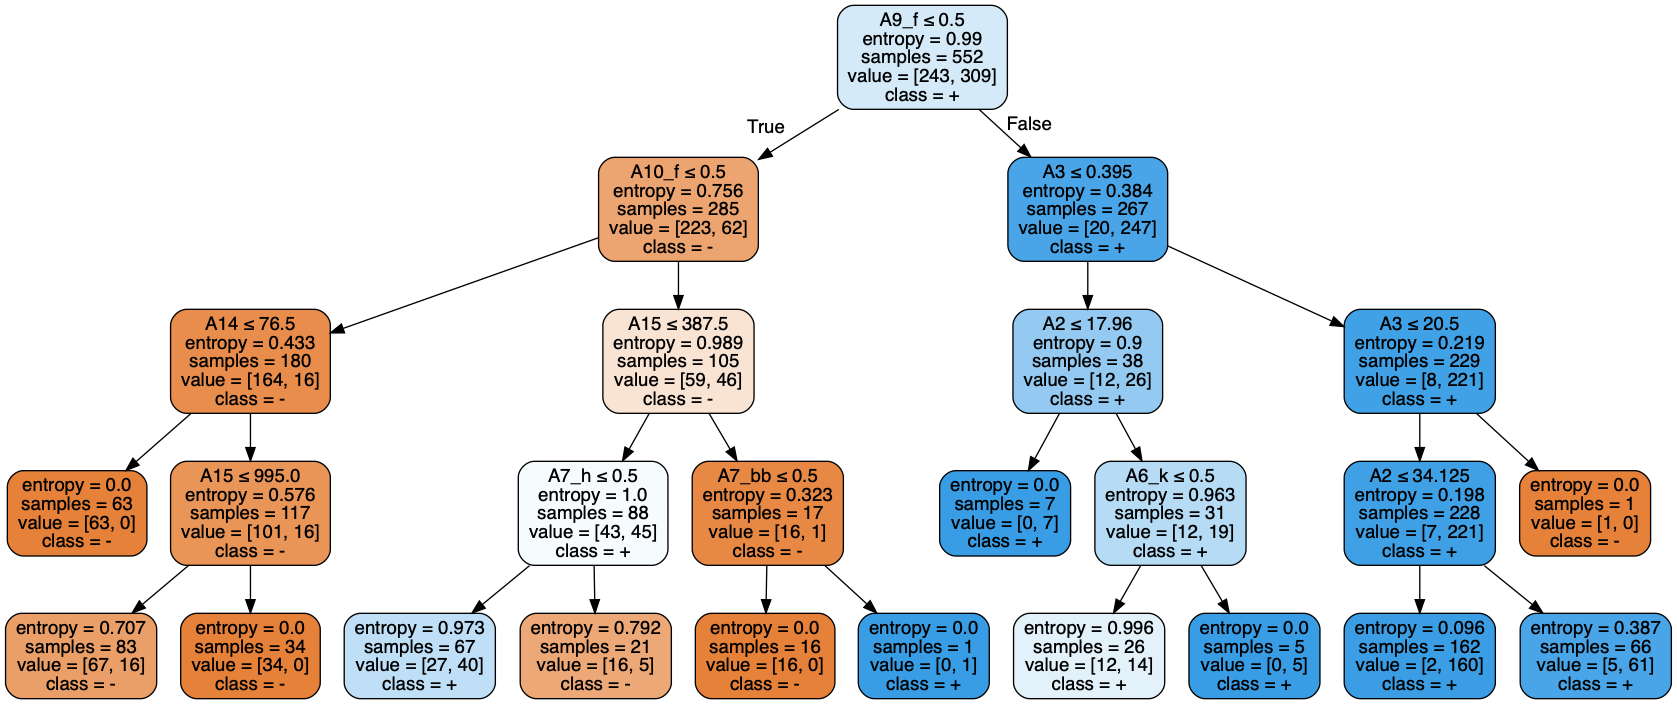

In [18]:
dt = DecisionTreeClassifier(max_depth=4, criterion='entropy') # Max_depth = 1, Criterion = entropy
dt.fit(X_train, y_train) # feeding the model with the data 

y_predicted = dt.predict(X_test) # getting the result from the model using the X_test set

# printing the Accuracy from the model using the function metrics from sklearn 
print('Accuracy', metrics.accuracy_score(y_test, y_predicted)) 
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=list(set(y)))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())